In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
def relu(x):
    if type(x) == int:
        if x>0:
            return x
        else:
            return 0
    return np.array([i if i>0 else 0 for i in x])

def diff(x,y,coef,knot,k):
    dif = np.array(coef[0] + coef[1]*x)
    for i in range(knot):
        dif += coef[i+2]*relu(x-k[i])
    dif -= y
    return dif

def cost_function(x,y,coef,knot,k):
    n = len(x)
    return 1/(2*n)*sum(diff(x,y,coef,knot,k)**2)

def plot_line(x,knot,coef,k):
    l = coef[0] + coef[1]*x
    for i in range(knot):
        l += coef[i+2]*relu(x-k[i])
    return l

In [3]:
class ContinousPiecewiseLinear:
    
    def fit(self,x,y,knot=2):
        self.k = [math.ceil(x.min()+(x.max()-x.min())/(knot+1)*i) for i in range(1,knot+1)]
        print('------knot-------')
        print(self.k)
        n = len(x)
        self.coef = [0]*(knot+2)
        cost = cost_function(x,y,self.coef,knot,self.k)
        max_iter = 0
        error=10000
        print('------error------')
        while error>0.1 and max_iter < 1000:
            coef_i = self.coef[:]
            coef_i[0] = coef_i[0] - 0.0001*sum(diff(x,y,self.coef,knot,self.k))/n
            coef_i[1] = coef_i[1] - 0.0001*sum(diff(x,y,self.coef,knot,self.k)*x)/n
            for i in range(knot):
                coef_i[i+2] = coef_i[i+2] - 0.0001*sum(diff(x,y,self.coef,knot,self.k)*relu(x-self.k[i]))/n
            self.coef = coef_i[:]
            error = cost_function(x,y,self.coef,knot,self.k)
            max_iter += 1
            if max_iter%100 == 0 :
                print(error)
        return self.coef
    
    def draw_plot(self,x,y,knot):
        x1 = np.linspace(min(x),max(x))
        x1 = np.append(x1,self.k)
        x1 = np.sort(x1)
        plt.plot(x1,plot_line(x1,knot,self.coef,self.k))
        plt.scatter(x,y)
        for i in self.k:
            plt.axvline(i,color='gray', linestyle='--', linewidth='1')

example

In [4]:
data = pd.read_csv("data/height-weight.csv")
data.head()
x = data['Weight']
y = data['Height']*100

In [5]:
PL = ContinousPiecewiseLinear()

In [6]:
PL.fit(x,y,2)

------knot-------
[60, 68]
------error------
21.376764536828883
14.378149315738574
9.85013046947358
6.919995371737131
5.023318331091769
3.795057620255798
2.9991226990537383
2.482821957597038
2.147401885793895
1.92899334041578


[0.08286173469074304,
 2.739430806021895,
 -1.2322604098559244,
 -0.3861444162146436]

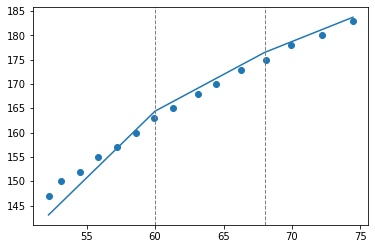

In [7]:
PL.draw_plot(x,y,2)